<a href="https://colab.research.google.com/github/huojiajin/NLP-Assignments/blob/main/Week4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the tools
import numpy as np
from scipy import linalg as lg
from scipy.linalg import svd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer

**Problem#1**
Compute the Eigen vectors and Eigen values of the following 3 matrices.
1. [2 0

  0 5]
2. [4 1 6

  0 2 3

  0 0 9]
3. [1 4 0 0

  0 2 0 0

  5 3 1 1
  
  4 7 2 2]

Can we compute the Eigen values and Eigen vectors of a non-square matrix?

In [ ]:
# The first matric
A = np.array([[2,0],[0,5]])
values, vector = lg.eig(A)
print('1:')
print(A)
print()
print(values)
print()
print(vector)

# The second matric
B = np.array([[4,1,6], [0,2,3], [0,0,9]])
values, vector = lg.eig(B)
print('2:')
print(B)
print()
print(values)
print()
print(vector)

# The last matric
C = np.array([[1,4,0,0], [0,2,0,0], [5,3,1,1], [4,7,2,2]])
values, vector = lg.eig(C)
print('2:')
print(C)
print()
print(values)
print()
print(vector)

1:
[[2 0]
 [0 5]]

[2.+0.j 5.+0.j]

[[1. 0.]
 [0. 1.]]
2:
[[4 1 6]
 [0 2 3]
 [0 0 9]]

[4.+0.j 2.+0.j 9.+0.j]

[[ 1.         -0.4472136   0.76337004]
 [ 0.          0.89442719  0.25445668]
 [ 0.          0.          0.59373225]]
2:
[[1 4 0 0]
 [0 2 0 0]
 [5 3 1 1]
 [4 7 2 2]]

[0.+0.j 3.+0.j 1.+0.j 2.+0.j]

[[ 0.          0.          0.19518001  0.10929207]
 [ 0.          0.          0.          0.02732302]
 [-0.70710678 -0.4472136   0.09759001 -0.31421469]
 [ 0.70710678 -0.89442719 -0.97590007 -0.94264406]]


We can't compute the Eigen values and Eigen vectors of a non-square matrix

**Problem#2** Compute the SVD (Singular Value Decomposition) (3 separate matrices U,Sigma,V) of the following matrix.

    𝐴=[5 7 21 32

      0 3 43 24

      2 36 95 84

      92 37 57 64]

Verify that by multiplying (Matrix multiplication) of the 3 SVD matrices will result in the original matrix.

In [ ]:
A = np.array([[5,7,21,32], [0,3,43,24], [2,36,95,84], [92,37,57,64]])

# Control the accuracy
np.set_printoptions(precision = 4, suppress = True)

# Caculator the SVD
V, Sigma, UStar = svd(A)

print('V:\n', V, '\n\n', 'Sigma:\n', Sigma, '\n\n', 'UStar:\n', UStar)

sigmaMatrix = np.diag(Sigma)
res = np.dot(V, sigmaMatrix)
recreateA = np.dot(res, UStar)

print('\nRecreated Matrix A: \n', recreateA)
print('\nOriginal Matrix A: \n', A)

V:
 [[-0.2047 -0.1045 -0.5134 -0.8268]
 [-0.2402 -0.2629  0.8326 -0.4243]
 [-0.686  -0.5954 -0.1983  0.3682]
 [-0.6556  0.7519  0.0627  0.0283]] 

 Sigma:
 [181.0895  73.8151  14.8546   8.3222] 

 UStar:
 [[-0.3463 -0.2822 -0.647  -0.6179]
 [ 0.914   0.0659 -0.3686 -0.1564]
 [ 0.1889 -0.3981  0.6569 -0.6119]
 [-0.0951  0.8704  0.1186 -0.4684]]

Recreated Matrix A: 
 [[ 5.  7. 21. 32.]
 [-0.  3. 43. 24.]
 [ 2. 36. 95. 84.]
 [92. 37. 57. 64.]]

Original Matrix A: 
 [[ 5  7 21 32]
 [ 0  3 43 24]
 [ 2 36 95 84]
 [92 37 57 64]]


**Problem 3**
Start with Matrix A created in the previous problem.

Make the first row of matrix ‘A’ be the sum of the 2nd and the 3rd rows. Make the last row of Matrix A same as the 2nd row. See the Python code below to create this new matrix.

Compute the SVD of this new matrix. Why the last 2 values of the ‘Sigma’ matrix values are zeros. Explain.

In [ ]:
# Create the new matrix
A[0] = A[1] + A[2]
A[-1] = A[1]
print('New Matrix: \n', A)

# Caculator the SVD
V, Sigma, UStar = svd(A)

print('\nV:\n', V, '\n\n', 'Sigma:\n', Sigma, '\n\n', 'UStar:\n', UStar)

New Matrix: 
 [[  2  39 138 108]
 [  0   3  43  24]
 [  2  36  95  84]
 [  0   3  43  24]]

V:
 [[-0.7716 -0.0679  0.6324  0.0073]
 [-0.2066 -0.5978 -0.308  -0.7107]
 [-0.565   0.5298 -0.6324 -0.0073]
 [-0.2066 -0.5978 -0.3244  0.7034]] 

 Sigma:
 [232.67    18.6197   0.       0.    ] 

 UStar:
 [[-0.0115 -0.2221 -0.7647 -0.6048]
 [ 0.0496  0.6895 -0.5611  0.4553]
 [ 0.146   0.6756  0.3157 -0.65  ]
 [-0.988   0.1371  0.0274 -0.0662]]


the last 2 values of the ‘Sigma’ matrix values are zeros is because of the 'Sigma' matrix shows the dependency of data. After the transform of the origin matrix, the 1th row is denpend on the 2th row and the 3th row, and the last row depend on the 2th row. So the rank of the matrix is 2 and the last 2 values are zeros.

**Problem#4**
Compute the SVD (Singular Value Decomposition) (3 separate matrices U, Sigma, V) of the following 2 rectangular matrices.
4. [3 1 1

  −1 3 1]
5. [1 1 0

  1 −1 1]

Verify that by multiplying (Matrix multiplication) the 3 SVD matrices will result in the original matrix.

In [ ]:
# 4
A = np.array([[3,1,1], [-1,3,1]])
# Caculate
V, Sigma, UStar = svd(A)
print('4:')
print('\nV:\n', V, '\n\n', 'Sigma:\n', Sigma, '\n\n', 'UStar:\n', UStar)

# Verify
# Convert the Sigma martix and fill by zero
sigmaMatrix = np.diag(Sigma)
z = np.zeros((2,1))
sigmaMatrix_extended = np.hstack((sigmaMatrix, z))
# multiple and re-create the origin martix
res = np.dot(V, sigmaMatrix_extended)
recreateA = np.dot(res, UStar)
print('\nVerify')
print('\nRecreated Matrix A: \n', recreateA)
print('\nOriginal Matrix A: \n', A)

4:

V:
 [[-0.7071 -0.7071]
 [-0.7071  0.7071]] 

 Sigma:
 [3.4641 3.1623] 

 UStar:
 [[-0.4082 -0.8165 -0.4082]
 [-0.8944  0.4472  0.    ]
 [-0.1826 -0.3651  0.9129]]

Verify

Recreated Matrix A: 
 [[ 3.  1.  1.]
 [-1.  3.  1.]]

Original Matrix A: 
 [[ 3  1  1]
 [-1  3  1]]


In [ ]:
# 5
A = np.array([[1,1,0], [1, -1, 1]])

# Caculate
V, Sigma, UStar = svd(A)
print('5:')
print('\nV:\n', V, '\n\n', 'Sigma:\n', Sigma, '\n\n', 'UStar:\n', UStar)

# Verify
# Convert the Sigma martix and fill by zero
sigmaMatrix = np.diag(Sigma)
z = np.zeros((2,1))
sigmaMatrix_extended = np.hstack((sigmaMatrix, z))
# multiple and re-create the origin martix
res = np.dot(V, sigmaMatrix_extended)
recreateA = np.dot(res, UStar)
print('\nVerify')
print('\nRecreated Matrix A: \n', recreateA)
print('\nOriginal Matrix A: \n', A)

5:

V:
 [[ 0. -1.]
 [ 1.  0.]] 

 Sigma:
 [1.7321 1.4142] 

 UStar:
 [[ 0.5774 -0.5774  0.5774]
 [-0.7071 -0.7071  0.    ]
 [-0.4082  0.4082  0.8165]]

Verify

Recreated Matrix A: 
 [[ 1.  1.  0.]
 [ 1. -1.  1.]]

Original Matrix A: 
 [[ 1  1  0]
 [ 1 -1  1]]


**Problem#5** 

Using the Singular Value Decomposition (SVD) principals, perform the Latent Semantics Analysis (LSA) of the following 6 documents. Divide these documents into 2 different topics. 
1. 'runs', 
2. 'runs pitcher innings', 
3. 'pitcher', 
4. 'touchdown', 
5. 'quarterback', 
6. 'touchdown quarterback' 

Use the following 2 libraries to solve this problem. 

• from sklearn.feature_extraction.text import CountVectorizer 

• from sklearn.decomposition import TruncatedSVD

In [ ]:
vectorizer = CountVectorizer()

corpus = ['runs', 'runs pitcher innings', 'pitcher', 'touchdown', 'quarterback', 'touchdown quarterback']

bag_of_words = vectorizer.fit_transform(corpus)

# Document Term Matrix
A_Document = bag_of_words.todense()

sigma_signifant_num = 2
svd = TruncatedSVD(n_components = sigma_signifant_num)
lsa_Document = svd.fit_transform(A_Document)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

topic_encoded_df = pd.DataFrame(lsa_Document, columns=["Topic-1", "Topic-2"])
topic_encoded_df["corpus"] = corpus

display(topic_encoded_df[['corpus', 'Topic-1', 'Topic-2']])




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


,corpus,Topic-1,Topic-2
0,runs,0.628,-0.000
1,runs pitcher innings,1.716,-0.000
2,pitcher,0.628,-0.000
3,touchdown,0.000,0.707
4,quarterback,0.000,0.707
5,touchdown quarterback,0.000,1.414


**Problem#5 - continued**
1. Using the SK Learn CounVectorizer function, vectorize all the 6 documents in the corpus. Compute the “cosine similarity” & “cosine distance” between all the 6 document’s normalized vectors.

In [ ]:
# Define the method
def cosine_Similarity(pt1, pt2):
  return np.dot(pt1, pt2)

def normalized(pt1):
  return pt1 / np.linalg.norm(pt1)

# Create Normalized Vectors
vectorsNormalized = []
for vector in bag_of_words.toarray():
  vectorsNormalized.append(normalized(vector))

# Compute
numDocu = len(corpus)
cosine_SimtMatrix = np.zeros((numDocu, numDocu))
cosine_DistMatrix = np.zeros((numDocu, numDocu))
for i in range(numDocu):
  for j in range(numDocu):
    cosine_SimtMatrix[i,j] = cosine_Similarity(vectorsNormalized[i], vectorsNormalized[j])
    cosine_DistMatrix[i,j] = 1- cosine_SimtMatrix[i,j]

print('Cosine Similarity')
print(cosine_SimtMatrix)
print()
print('Cosine Distance')
print(cosine_DistMatrix)

Cosine Similarity
[[1.     0.5774 0.     0.     0.     0.    ]
 [0.5774 1.     0.5774 0.     0.     0.    ]
 [0.     0.5774 1.     0.     0.     0.    ]
 [0.     0.     0.     1.     0.     0.7071]
 [0.     0.     0.     0.     1.     0.7071]
 [0.     0.     0.     0.7071 0.7071 1.    ]]

Cosine Distance
[[ 0.      0.4226  1.      1.      1.      1.    ]
 [ 0.4226 -0.      0.4226  1.      1.      1.    ]
 [ 1.      0.4226  0.      1.      1.      1.    ]
 [ 1.      1.      1.      0.      1.      0.2929]
 [ 1.      1.      1.      1.      0.      0.2929]
 [ 1.      1.      1.      0.2929  0.2929  0.    ]]


2. Compute the ‘Document Term Matrix’ (DTM) and ‘Term (Word) Document Matrix’ (TDM) using the document’s vectors.

In [ ]:
print('Term - word - Document Matrix - TDM')
print('5 Words x 6 Docu')
print(bag_of_words.todense().T)
print()
print('Document Term Matrix - DTM')
print('6 Docu x 5 Words')
print(bag_of_words.todense())

Term - word - Document Matrix - TDM
5 Words x 6 Docu
[[0 1 0 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 0 1 1]
 [1 1 0 0 0 0]
 [0 0 0 1 0 1]]

Document Term Matrix - DTM
6 Docu x 5 Words
[[0 0 0 1 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 1]]


3. Compute the ‘Singular Value Decomposition’ (SVD) matrix for both DTM (Document Term Matrix) & TDM (Term Document Matrix) computed in the previous step. Using only the first 2 eigen values from the SVD and the SK Learn TruncatedSVD function, compute the Truncated DTM and TDM.

In [ ]:
sigma_signifant_num = 2
svd = TruncatedSVD(n_components = sigma_signifant_num)

print('TDM(Word)Vector')
lsa_Word = svd.fit_transform(bag_of_words.todense().T)
print(lsa_Word)
print()

print('DTM(DOcument)Vector')
lsa_Document = svd.fit_transform(bag_of_words.todense())
print(lsa_Document)

TDM(Word)Vector
[[ 0.8881  0.    ]
 [ 1.2131  0.    ]
 [-0.      1.2247]
 [ 1.2131  0.    ]
 [-0.      1.2247]]

DTM(DOcument)Vector
[[ 0.628   0.    ]
 [ 1.7156  0.    ]
 [ 0.628   0.    ]
 [-0.      0.7071]
 [-0.      0.7071]
 [-0.      1.4142]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


4. What are the topics on which LSA has divided these set of documents?
Plot all the 6 Truncated vectors with the following specifications.

    • X-axis: Truncated DTM/Topic-1 values

    • Y-axis: Truncated DTM/Topic-2 values

    Compute the ‘cosine similarity’ and ‘cosine distance’ using the Truncated SVD.

Text(0, 0.5, 'Topic-2')

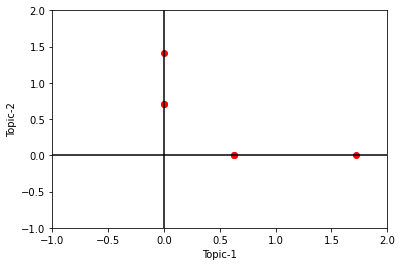

In [ ]:
# Plot
v0 = lsa_Document[:,0]
v1 = lsa_Document[:,1]
#print(v0)
#print(v1)

fig, ax = plt.subplots()

plt.xlim([-1, 2])
plt.ylim([-1, 2])
ax.scatter(list(np.abs(v0)), list(np.abs(v1)), color = 'red')
ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xlabel("Topic-1")
plt.ylabel("Topic-2")

In [ ]:
# Compute the ‘cosine similarity’ and ‘cosine distance'
numDocu = len(lsa_Document)
vectorsNormalized = []

for vector in lsa_Document:
  vectorsNormalized.append(normalized(vector))

cosine_SimtMatrix = np.zeros((numDocu, numDocu))
cosine_DistMatrix = np.zeros((numDocu, numDocu))
for i in range(numDocu):
  for j in range(numDocu):
    cosine_SimtMatrix[i,j] = cosine_Similarity(vectorsNormalized[i], vectorsNormalized[j])
    cosine_DistMatrix[i,j] = 1- cosine_SimtMatrix[i,j]

print('Cosine Similarity')
print(cosine_SimtMatrix)
print()
print('Cosine Distance')
print(cosine_DistMatrix)

Cosine Similarity
[[ 1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0. -0. -0.]
 [ 1.  1.  1.  0. -0. -0.]
 [ 0.  0.  0.  1.  1.  1.]
 [ 0. -0. -0.  1.  1.  1.]
 [ 0. -0. -0.  1.  1.  1.]]

Cosine Distance
[[0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]


5. Which documents are more appropriate for ‘Topic-1’ and ‘Topic-2’?

Document0、Document1、Document2 are more appropriate for 'Topic-1', and the rest of the Documents are more appropriate for 'Topic-2'

6. Which are the top 2 words that describe ‘Topic-1’ and ‘Topic-2’?


In [ ]:
cv = CountVectorizer();
X = cv.fit_transform(corpus)

encoding_matrix = pd.DataFrame(svd.components_, index = ['Topic-1', 'Topic-2'], columns = cv.get_feature_names_out()).T
print(encoding_matrix)

             Topic-1  Topic-2
innings        0.460   -0.000
pitcher        0.628    0.000
quarterback   -0.000    0.707
runs           0.628    0.000
touchdown     -0.000    0.707


The top 2 words describe 'Topic-1' is 'pitcher' and 'runs'

The top 2 words describe 'Topic-2' is 'quarterback' and 'touchdown'

**Optional:**

Compute the ‘Singular Value Decomposition’ (SVD) matrix for both DTM (Document Term Matrix) & TDM (Term Document Matrix) matrices.

Using only the first 2 eigen values from the SVD, create the Truncated DTM and Truncated TDM matrices WITHOUT using SK Learn TruncatedSVD function.

In [ ]:
np.set_printoptions(precision = 4, suppress = True)

def no_sk_truncate(pt1):
  V, Sigma, UStar = svd(pt1)
  sigma_signifant_num = 2
  Truncated_UMatrix = V[:,:sigma_signifant_num]
  Truncated_SigmaMatrix = Sigma[:sigma_signifant_num]
  Truncated_Full_SigmaMatrix = np.diag(Truncated_SigmaMatrix)
  reduced_matrix = np.dot(Truncated_UMatrix, Truncated_Full_SigmaMatrix)
  print(reduced_matrix)

print('Truncated TDM')
print(no_sk_truncate(bag_of_words.todense().T))
print()
print('Truncated DTM')
print(no_sk_truncate(bag_of_words.todense()))

Truncated TDM
[[-0.8881  0.    ]
 [-1.2131  0.    ]
 [ 0.     -1.2247]
 [-1.2131  0.    ]
 [ 0.     -1.2247]]
None

Truncated DTM
[[-0.628   0.    ]
 [-1.7156  0.    ]
 [-0.628   0.    ]
 [ 0.      0.7071]
 [ 0.      0.7071]
 [ 0.      1.4142]]
None
